# Data Mining - assignment #1

## First Approach: Apriori Algorithm


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import matplotlib.pyplot as plt

### Read true.csv file and label it with 1


In [4]:
true_df = pd.read_csv(r"True.csv", sep=",")
true_df["label"] = 1
true_df.sample(5)

,title,text,subject,date,label
16893,"Raqqa to be part of 'federal Syria', U.S.-back...",BEIRUT (Reuters) - Raqqa will be part of a dec...,worldnews,"October 20, 2017",1
20642,"Nine dead, seven missing after Irma hits Frenc...",PARIS (Reuters) - Nine people have been killed...,worldnews,"September 8, 2017",1
1415,Trump tax plan expends recession-fighting U.S....,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"October 4, 2017",1
6906,U.S. top court weighs race challenges to legis...,WASHINGTON (Reuters) - U.S. Supreme Court just...,politicsNews,"December 5, 2016",1
19970,Macron enacts public ethics law with a whiff o...,PARIS (Reuters) - President Emmanuel Macron in...,worldnews,"September 15, 2017",1


### Read fake.csv file and label it with 0


In [5]:
fake_df = pd.read_csv(r"Fake.csv", sep=",")
fake_df["label"] = 0
fake_df.sample(5)

,title,text,subject,date,label
5763,Read Gabby Giffords’ Beautiful Letter In Soli...,When Congresswoman Gabrielle Giffords was shot...,News,"June 23, 2016",0
2760,BUSTED: Trump’s Education Nominee Plagiarized...,How can we expect our kids to do their homewor...,News,"January 31, 2017",0
16342,DRAIN THE SWAMP! EPA Wastes Millions To Make S...,The Environmental Protection Agency is looking...,Government News,"Oct 25, 2016",0
790,WATCH: Republican Strategist BLASTS ‘Lawless’...,Democrats and Republicans don t agree on a lot...,News,"July 22, 2017",0
22066,FBI Agent Indicted In Killing of Lavoy Finicum...,21st Century Wire says Back in January of 2016...,US_News,"July 15, 2017",0


### Combine true and fake news in one dataframe


In [89]:
all_news_df = pd.concat([true_df, fake_df], ignore_index=True)
all_news_df.sample(10)

,title,text,subject,date,label
42763,TEAM CLINTON MEMBER BILL GATES Pushed For Unli...,The question is not how Hillary will ever be ...,left-news,"Nov 11, 2015",0
3185,What we know about U.S. probes of Russian medd...,(Reuters) - U.S. intelligence agencies have al...,politicsNews,"June 15, 2017",1
20681,Trump offers to mediate talks on Qatar crisis,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"September 7, 2017",1
6182,Facts about the inauguration of Donald Trump a...,(Reuters) - With his left hand on a Bible used...,politicsNews,"January 19, 2017",1
35588,TRUMP-BACKED GOLFER MAKES IT TO THE MASTERS: “...,I m so proud of him. Isn t that a great story...,politics,"Apr 4, 2016",0
33780,MOCK ASSASSINATION OF DONALD TRUMP Sparks Outr...,"A San Antonio, Texas school is under fire for ...",politics,"Nov 18, 2016",0
9343,Supreme Court to hear State Farm case over Hur...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"May 31, 2016",1
24029,WATCH: Colbert Asks Tapper How CNN Staff Feel...,Donald Trump is no fan of CNN. He has repeated...,News,"February 9, 2017",0
26974,Donald Trump Can’t Even Control His Temper In...,"In a meeting about party unity, Donald Trump...",News,"July 7, 2016",0
16678,New Zealand PM-designate confirms review of ce...,SYDNEY (Reuters) - New Zealand prime minister-...,worldnews,"October 24, 2017",1


### Produce a Frequency-Term Table out of the datafarame


In [ ]:
vectorizer = CountVectorizer(stop_words="english", binary=True)
matrix = vectorizer.fit_transform(all_news_df["title"] + " " + all_news_df["text"])

In [8]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(
    matrix, columns=vectorizer.get_feature_names_out()
)
sparse_df.sample(10)

,00,000,0000,00000017,00004,000048,000063,00007,000270,00042,...,zzsg90pbf6,zztaine,zzucqevt3m,zzuml4hkoc,zzzzaaaacccchhh,zzzzzzzz,zzzzzzzzzzzzz,émigré,état,žižek
10864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6933,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Produce Frequent Itemsets


In [9]:
freq_items = apriori(sparse_df, min_support=0.1, use_colnames=True)
freq_items.sample(20)

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
729,0.142256,"(donald, house, president)"
179,0.173215,(world)
71,0.104504,(issue)
506,0.330482,"(people, said)"
996,0.134794,"(trump, time, said)"
529,0.107978,"(political, reuters)"
95,0.150385,(monday)
612,0.239588,"(time, said)"
1019,0.113413,"(donald, house, president, white)"
988,0.105484,"(united, state, said)"


### List the top 20 popular words


In [ ]:
freq_words = freq_items[freq_items["itemsets"].apply(len) == 1]
frequent_words_sorted = freq_words.sort_values(by="support", ascending=False)
top_20 = frequent_words_sorted.head(20)
top_20

,support,itemsets
134,0.732460,(said)
120,0.528932,(president)
157,0.504855,(trump)
130,0.483006,(reuters)
111,0.431690,(people)
45,0.412446,(donald)
101,0.360573,(new)
72,0.343601,(just)
155,0.337922,(told)
144,0.321195,(state)


### Bar plot visualization of the 20 top popular words


C:\Users\ibrahima\AppData\Local\Temp\ipykernel_5308\4011254877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))


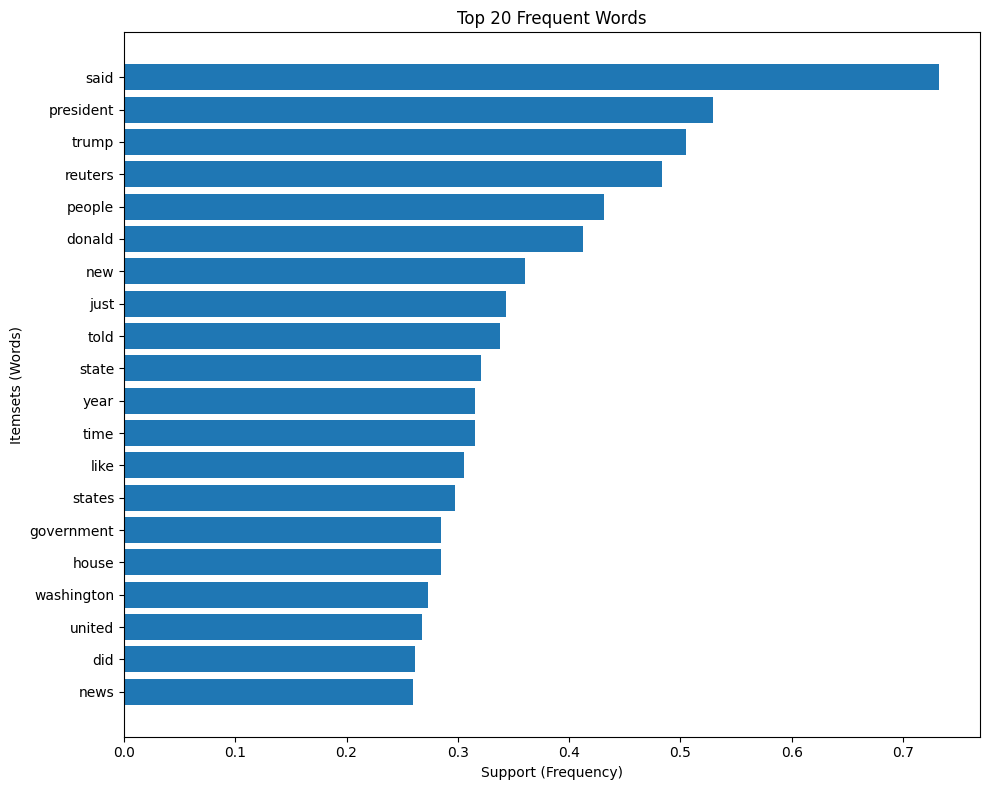

In [11]:
top_20["itemsets_str"] = top_20["itemsets"].apply(lambda x: ", ".join(list(x)))
plt.figure(figsize=(10, 8))
plt.barh(top_20["itemsets_str"], top_20["support"])
plt.xlabel("Support (Frequency)")
plt.ylabel("Itemsets (Words)")
plt.title("Top 20 Frequent Words")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Generate association rules out of the frequent Itemsets


In [90]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.9)
print(f"{len(rules)} rules generated.")
rules_sorted = rules.sort_values(by="lift", ascending=False)
rules_sorted.head(20)

324 rules generated.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
146,"(donald, featured)","(trump, image)",0.113747,0.145641,0.108023,0.949677,6.520660,1.0,0.091456,16.977472,0.955304,0.713655,0.941098,0.845690
21,"(hillary, said)",(clinton),0.114549,0.168382,0.106842,0.932724,5.539345,1.0,0.087554,12.361310,0.925486,0.606754,0.919102,0.783624
22,"(said, clinton)",(hillary),0.116843,0.173593,0.106842,0.914411,5.267542,1.0,0.086559,9.655520,0.917343,0.581948,0.896432,0.764942
23,"(trump, clinton)",(hillary),0.122745,0.173593,0.110918,0.903647,5.205537,1.0,0.089610,8.576886,0.920937,0.598198,0.883408,0.771300
323,"(donald, said, united, president)","(trump, states)",0.111609,0.182146,0.105127,0.941928,5.171273,1.0,0.084798,14.083386,0.907960,0.557327,0.928994,0.759543
306,"(united, donald, said)","(trump, states)",0.123769,0.182146,0.116575,0.941875,5.170984,1.0,0.094031,14.070630,0.920549,0.615692,0.928930,0.790942
292,"(donald, united, president)","(trump, states)",0.126709,0.182146,0.119048,0.939532,5.158123,1.0,0.095968,13.525495,0.923096,0.627200,0.926066,0.796558
225,"(donald, united)","(trump, states)",0.143570,0.182146,0.134616,0.937636,5.147710,1.0,0.108466,13.114143,0.940811,0.704429,0.923746,0.838346
15,(barack),"(obama, president)",0.119137,0.184730,0.110562,0.928024,5.023682,1.0,0.088554,11.326961,0.909270,0.571955,0.911715,0.763264
76,"(featured, just)",(image),0.124282,0.207403,0.118847,0.956272,4.610687,1.0,0.093071,18.125774,0.894252,0.558393,0.944830,0.764648


### Scatterplot of the rules was generated (between support and confidence)


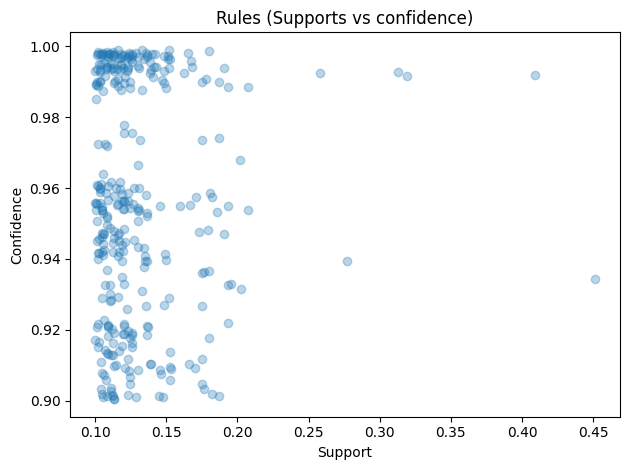

In [ ]:
plt.scatter(rules["support"], rules["confidence"], alpha=0.3)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Rules (Supports vs confidence)")
plt.gca()
plt.tight_layout()

In [14]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(added),(said),0.111876,0.732460,0.102544,0.916584,1.251377,1.0,0.020599,3.207284,0.226185,0.138238,0.688210,0.528291
1,(barack),(obama),0.119137,0.229899,0.118535,0.994952,4.327782,1.0,0.091146,152.565588,0.872933,0.514253,0.993445,0.755275
2,(barack),(president),0.119137,0.528932,0.110807,0.930080,1.758411,1.0,0.047791,6.737277,0.489639,0.206243,0.851572,0.569786
3,(donald),(trump),0.412446,0.504855,0.409150,0.992008,1.964934,1.0,0.200924,61.953289,0.835799,0.805172,0.983859,0.901219
4,(featured),(image),0.182725,0.207403,0.173170,0.947708,4.569396,1.0,0.135272,15.157254,0.955802,0.798173,0.934025,0.891326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,"(trump, president, united, states, said)",(donald),0.113168,0.412446,0.105127,0.928951,2.252297,1.0,0.058452,8.269701,0.626961,0.250013,0.879077,0.591919
320,"(trump, president, united, donald, said)",(states),0.111096,0.297051,0.105127,0.946271,3.185550,1.0,0.072126,13.083243,0.771830,0.346931,0.923566,0.650087
321,"(trump, united, states, donald, said)",(president),0.116575,0.528932,0.105127,0.901796,1.704937,1.0,0.043467,4.796826,0.468029,0.194543,0.791529,0.550275
322,"(president, united, states, donald, said)",(trump),0.105394,0.504855,0.105127,0.997464,1.975742,1.0,0.051918,195.252001,0.552043,0.208122,0.994878,0.602848


## Analyze the association rules based on top words of fake and true news:
- Find unique sets of top words for both the fake the true news and filter the association rules based on them

In [67]:
# Fake top words: derived from top_20_fake file
fake = [
    "trump",
    "said",
    "just",
    "people",
    "president",
    "video",
    "like",
    "image",
    "donald",
    "time",
    "featured",
    "new",
    "news",
    "right",
    "make",
    "know",
    "obama",
    "america",
    "don",
    "going",
    "way",
    "did",
    "american",
    "watch",
    "say",
    "white",
    "told",
    "year",
    "state" "house",
]
# True top words: derived from top_20_true file
real = [
    "reuters",
    "said",
    "president",
    "trump",
    "donald",
    "told",
    "state",
    "government",
    "year",
    "new",
    "people",
    "states",
    "united",
    "house",
    "republican",
    "including",
    "week",
    "country",
    "tuesday",
    "election",
    "wednesday",
    "time",
    "did",
    "years",
    "thursday",
    "statement",
    "national",
    "security",
    "minister",
    "called",
]

common_items_set = set(fake) & set(real)
common_items_set

{'did',
 'donald',
 'new',
 'people',
 'president',
 'said',
 'time',
 'told',
 'trump',
 'year'}

Unique Top Real Words Set:

In [46]:
pure_real_set = set(real) - common_items_set
pure_real_set

{'called',
 'country',
 'election',
 'government',
 'house',
 'including',
 'minister',
 'national',
 'republican',
 'reuters',
 'security',
 'state',
 'statement',
 'states',
 'thursday',
 'tuesday',
 'united',
 'wednesday',
 'week',
 'years'}

Unique Top Fake Words Set:

In [45]:
pure_fake_set = set(fake) - common_items_set
pure_fake_set

{'america',
 'american',
 'don',
 'featured',
 'going',
 'image',
 'just',
 'know',
 'like',
 'make',
 'news',
 'obama',
 'right',
 'say',
 'statehouse',
 'video',
 'watch',
 'way',
 'white'}

### Association Rules More related to fake news

In [76]:
mask_col1 = rules["antecedents"].apply(lambda x: not pure_fake_set.isdisjoint(x))
mask_col2 = rules["consequents"].apply(lambda x: not pure_fake_set.isdisjoint(x))

most_likely_fake_rules = rules[mask_col1 & mask_col2]
most_likely_fake_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(featured),(image),0.182725,0.207403,0.173170,0.947708,4.569396,1.0,0.135272,15.157254,0.955802,0.798173,0.934025,0.891326
34,"(donald, featured)",(image),0.113747,0.207403,0.108245,0.951635,4.588328,1.0,0.084654,16.387816,0.882429,0.508421,0.938979,0.736771
76,"(featured, just)",(image),0.124282,0.207403,0.118847,0.956272,4.610687,1.0,0.093071,18.125774,0.894252,0.558393,0.944830,0.764648
77,"(like, featured)",(image),0.105528,0.207403,0.100851,0.955678,4.607819,1.0,0.078964,17.882488,0.875352,0.475530,0.944079,0.720966
78,"(people, featured)",(image),0.116063,0.207403,0.110116,0.948762,4.574477,1.0,0.086044,15.468991,0.883995,0.516129,0.935355,0.739845
79,"(featured, said)",(image),0.112522,0.207403,0.106063,0.942597,4.544751,1.0,0.082725,13.807579,0.878856,0.495938,0.927576,0.726990
80,"(trump, featured)",(image),0.132255,0.207403,0.126353,0.955372,4.606347,1.0,0.098923,17.760145,0.902233,0.592357,0.943694,0.782293
144,"(donald, trump, featured)",(image),0.113457,0.207403,0.108023,0.952101,4.590572,1.0,0.084491,16.547077,0.882261,0.507535,0.939566,0.736467
146,"(donald, featured)","(trump, image)",0.113747,0.145641,0.108023,0.949677,6.520660,1.0,0.091456,16.977472,0.955304,0.713655,0.941098,0.845690


### Association Rules More related to true news

In [ ]:
mask_col1 = rules["antecedents"].apply(lambda x: not (pure_real_set.isdisjoint(x)))
mask_col2 = rules["consequents"].apply(lambda x: not (pure_real_set.isdisjoint(x)))

# 3. Combine masks: Keep row only if BOTH columns are disjoint from exclude_set
most_likely_true_rules = rules[mask_col1 | mask_col2]
most_likely_true_rules = most_likely_true_rules.sort_values(by='support', ascending=False)
most_likely_true_rules.head(30)
most_likely_true_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
87,"(house, told)",(said),0.115261,0.732460,0.104637,0.907826,1.239420,1.0,0.020213,2.902554,0.218337,0.140815,0.655476,0.525342
28,"(democratic, reuters)",(said),0.110384,0.732460,0.104570,0.947337,1.293362,1.0,0.023719,5.080180,0.254966,0.141642,0.803157,0.545051
100,"(political, reuters)",(said),0.107978,0.732460,0.103791,0.961221,1.312318,1.0,0.024701,6.899110,0.266798,0.140896,0.855054,0.551461
205,"(trump, states, reuters)",(donald),0.108067,0.412446,0.103724,0.959810,2.327118,1.0,0.059152,14.619549,0.639380,0.248864,0.931598,0.605648
204,"(donald, states, reuters)",(trump),0.104793,0.504855,0.103724,0.989798,1.960557,1.0,0.050819,48.534481,0.547294,0.205019,0.979396,0.597625
308,"(states, united, reuters, president)",(said),0.108023,0.732460,0.103590,0.958969,1.309244,1.0,0.024468,6.520441,0.264805,0.140577,0.846636,0.550199
44,"(donald, national)",(trump),0.104236,0.504855,0.103524,0.993162,1.967221,1.0,0.050899,72.414890,0.548882,0.204767,0.986191,0.599109
246,"(trump, states, reuters)",(said),0.108067,0.732460,0.103301,0.955894,1.305046,1.0,0.024146,6.065901,0.262064,0.140121,0.835144,0.548464
148,"(donald, house, reuters)",(trump),0.103501,0.504855,0.103279,0.997848,1.976503,1.0,0.051025,230.093672,0.551095,0.204480,0.995654,0.601209
149,"(trump, house, reuters)",(donald),0.107577,0.412446,0.103279,0.960041,2.327678,1.0,0.058909,14.704072,0.639145,0.247822,0.931992,0.605223


## Results:
### Selected Top 5 Association Rules

In [78]:
# (featured) ---> (image)
most_likely_fake_rules.loc[4]

antecedents           (featured)
consequents              (image)
antecedent support      0.182725
consequent support      0.207403
support                  0.17317
confidence              0.947708
lift                    4.569396
representativity             1.0
leverage                0.135272
conviction             15.157254
zhangs_metric           0.955802
jaccard                 0.798173
certainty               0.934025
kulczynski              0.891326
Name: 4, dtype: object

In [80]:
# (minister, reuters) ---> (said)
most_likely_true_rules.loc[91]

antecedents           (minister, reuters)
consequents                        (said)
antecedent support               0.114259
consequent support                0.73246
support                          0.109314
confidence                       0.956725
lift                              1.30618
representativity                      1.0
leverage                         0.025624
conviction                       6.182338
zhangs_metric                    0.264647
jaccard                          0.148242
certainty                        0.838249
kulczynski                       0.552984
Name: 91, dtype: object

In [88]:
# (reuters, government) ---> (said)
most_likely_true_rules.loc[83]

antecedents           (reuters, government)
consequents                          (said)
antecedent support                 0.190543
consequent support                  0.73246
support                            0.182458
confidence                         0.957569
lift                               1.307332
representativity                        1.0
leverage                           0.042893
conviction                         6.305241
zhangs_metric                      0.290421
jaccard                            0.246383
certainty                          0.841402
kulczynski                         0.603336
Name: 83, dtype: object

In [81]:
# (reuters) ---> (said)
most_likely_true_rules.loc[8]

antecedents           (reuters)
consequents              (said)
antecedent support     0.483006
consequent support      0.73246
support                0.451245
confidence             0.934243
lift                   1.275487
representativity            1.0
leverage               0.097462
conviction             4.068631
zhangs_metric          0.417772
jaccard                0.590464
certainty              0.754217
kulczynski             0.775155
Name: 8, dtype: object

In [82]:
# (washington, house, reuters) --->	(said)
most_likely_true_rules.loc[230]

antecedents           (washington, house, reuters)
consequents                                 (said)
antecedent support                        0.109804
consequent support                         0.73246
support                                   0.104726
confidence                                0.953753
lift                                      1.302122
representativity                               1.0
leverage                                  0.024299
conviction                                5.784961
zhangs_metric                             0.260642
jaccard                                   0.141994
certainty                                 0.827138
kulczynski                                0.548366
Name: 230, dtype: object

In [85]:
# (donald, trump, said, reuters) ---> (president)
most_likely_true_rules.loc[262]

antecedents           (donald, trump, said, reuters)
consequents                              (president)
antecedent support                          0.193416
consequent support                          0.528932
support                                     0.174974
confidence                                  0.904652
lift                                        1.710337
representativity                                 1.0
leverage                                     0.07267
conviction                                  4.940522
zhangs_metric                               0.514912
jaccard                                     0.319661
certainty                                   0.797592
kulczynski                                   0.61773
Name: 262, dtype: object

## Summary

* Some of the words at the antecedent and consequent of these rules are belonging to both the popular words of Fake and Real News.  for example the word "said". Also The words are part of multiple news subjects like "featured" in (news) subject, and "president, minister" in (politics/middle-east) subjects".

* Some recommendations based on the discovered rule that might help understanding and identifying fake news from true news:
    * if a news record satisfies one of the following rules, there is a good chance it is true news:
        - (reuters)	--> (said)
        - (minister) --> (said)  or	 (minister, reuters) --> (said)
        - (reuters, government) --> (said)
        - (washington, house, reuters) --> (said)
        - (donald, trump, said, reuters) ---> (president)
    * if a news record satisfies one of the following rules,  there is a good chance it is fake news: 
        - (people, featured) ---> (image)
        - (featured) --> (image) or in other words contains the frequent set (featured,image). 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------